In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Bibliotecas que usarei ao longo da análise. Pandas serve para análise de dados/Seaborn gerar gráficos mais bonitos
#para melhor visualização/Matplolib não gosto mas todo mundo usa, irei usar também/Numpy pra caso seja necessário/
#o %matplolib inline é pra não mexer nos gráficos, eles ficam fixos no notebook


import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Dataset importado apenas com as colunas que serão analisadas, confere ;)

In [ ]:
#importando os arquivo csv

rg_norte = pd.read_csv ('/content/drive/My Drive/Maria Clara Ferreira Imersão Alura Desafio/UF_norte.csv',
                     encoding = "ISO - 8859-1")
rg_norte.drop(rg_norte.columns[[0]], axis=1, inplace=True) 
rg_norte.head()

,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,IN_TREINEIRO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q006,Q025
0,PA,21,M,3,0,1,1,1,1,472.9,466.0,497.3,369.1,0,780.0,D,E,A,A,B,A
1,PA,16,F,3,1,1,1,1,1,358.9,495.4,482.3,416.5,1,600.0,D,E,A,A,B,A
2,PA,18,F,1,0,1,1,1,1,574.2,538.7,582.6,571.5,0,640.0,H,E,A,D,C,B
3,PA,23,M,3,0,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,D,D,A,B,C,A
4,PA,23,M,3,0,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,B,C,A,A,C,A


In [ ]:
#Quer os gráficos histogramas bem bonitinhos? Taca o "sns.set(color_codes=True"!
sns.set(color_codes=True)

## Vamos começando tendo uma visão geral das raças inscritas no ENEM 2019 

In [ ]:
#calculando a porcentagem
porc_norte = rg_norte["TP_COR_RACA"].value_counts().sort_index() / len(rg_norte["TP_COR_RACA"]) 
porc_norte * 100

0     1.731757
1    16.146093
2    10.907749
3    67.807982
4     2.206058
5     1.200360
Name: TP_COR_RACA, dtype: float64

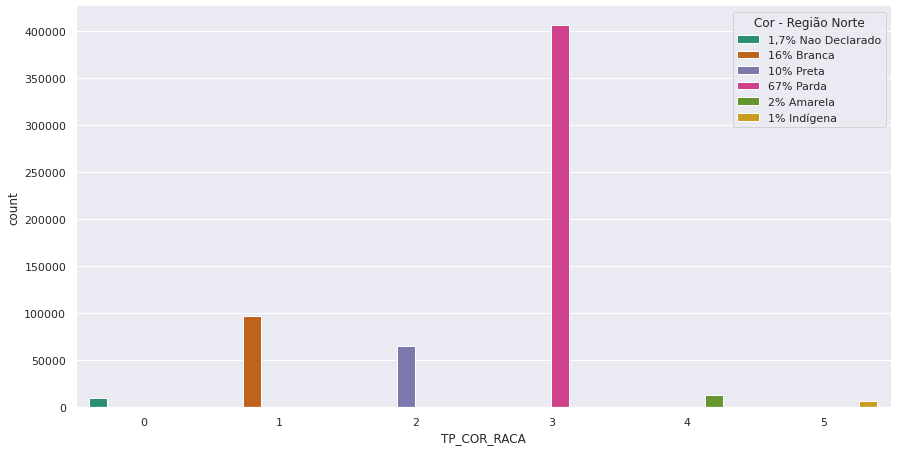

In [ ]:
with sns.color_palette('Dark2'):
 sns.catplot(x='TP_COR_RACA', kind ='count',hue='TP_COR_RACA', data = rg_norte, height=6.2, aspect =2,)
 plt.legend(title='Cor - Região Norte', loc='upper right', labels=['1,7% Nao Declarado', '16% Branca','10% Preta','67% Parda','2% Amarela','1% Indígena'])
 plt.ticklabel_format(axis='y', style='plain')
 


## **10% é a quantidade de candidatas (os) que se auto declararam pretas (os) na inscrição do ENEM 2019 e curioso que  a maioria dos inscritos do Norte  se autodeclaram pardos. Em 2013, na pesquisa de Desigualdade por Cor ou Raça, a população preta da região Norte era de 73,5% dos 15,8 milhões de habitantes.**




***Ao longo da análise, trarei dados recentes sobre a população negra na Região Norte***

In [ ]:
#Criei uma váriavel que contenha apenas os dados de inscritos pretos 
pretas_norte = rg_norte.loc[rg_norte['TP_COR_RACA'] == 2]
pretas_norte["TP_COR_RACA"].value_counts()


2    65336
Name: TP_COR_RACA, dtype: int64

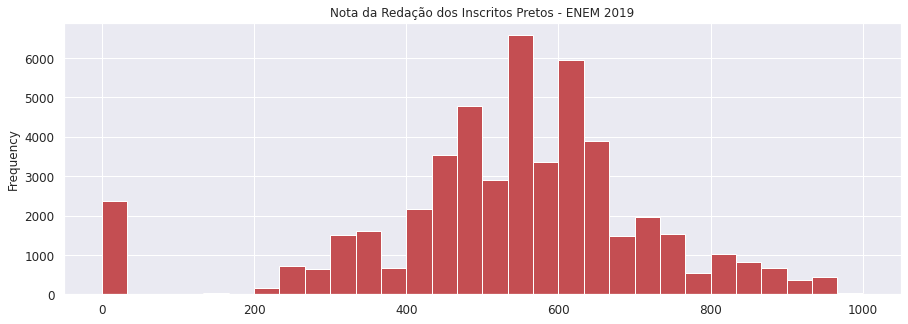

In [ ]:
#calculando nota da REDAÇÃO 
pretas_norte.query("TP_COR_RACA == 2")["NU_NOTA_REDACAO"].plot(kind='hist', bins = 30, figsize =(15,5), color='r', 
                                                               title='Nota da Redação dos Inscritos Pretos - ENEM 2019', 
                                                               fontsize =(12))



In [ ]:
total_inscritos_nota_zero = pretas_norte.query("NU_NOTA_REDACAO == 0")["NU_NOTA_REDACAO"].value_counts().sort_index()
total_inscritos_nota_zero


0.0    2370
Name: NU_NOTA_REDACAO, dtype: int64

###  **2.370** mil inscritos da região tiraram nota 0 na redação. Mas nem só de notas zeros se faz estatística. Vamos dar ver as notas altas (menor ou igual a 1000)

In [ ]:
total_inscritos_nota_alta = pretas_norte.query("NU_NOTA_REDACAO <= 1000")["NU_NOTA_REDACAO"].value_counts().sort_index()
total_inscritos_nota_alta

0.0       2370
40.0         1
60.0         1
80.0         2
100.0        1
120.0        4
140.0        5
160.0       23
180.0       20
200.0       62
220.0      110
240.0      309
260.0      404
280.0      642
300.0      638
320.0      863
340.0      647
360.0      951
380.0      668
400.0     1108
420.0     1069
440.0     1721
460.0     1821
480.0     2593
500.0     2189
520.0     2905
540.0     2801
560.0     3772
580.0     3347
600.0     3487
620.0     2473
640.0     2371
660.0     1510
680.0     1472
700.0      978
720.0      991
740.0      723
760.0      806
780.0      530
800.0      604
820.0      425
840.0      465
860.0      351
880.0      380
900.0      283
920.0      351
940.0      270
960.0      160
980.0       29
1000.0       1
Name: NU_NOTA_REDACAO, dtype: int64

### **Pode se observar que apenas 1 inscrito tirou 1000 na redação. E qual será mediana da idade das pessoas que tiraram zero?**

N/A = Engatinhando na estatística ainda, fui pesquisar as vantagens e desvantagens de usar mediana e segundo o wikipédia "A vantagem da mediana em relação à média é que a mediana pode dar uma ideia melhor de um valor típico porque não é tão distorcida por valores extremamente altos ou baixos." Resolvi testar :)

In [ ]:
median_idade = pretas_norte.query("NU_NOTA_REDACAO == 0").median()["NU_IDADE"]
median_idade 

21.0

### A mediana da idade das pessoas que tiraram nota zero, é de 21 anos. Outro ponto que vale ressaltar aqui, é que a população preta no Norte de  25 anos ou mais de idade que possuem **ensino fundamental completo** é de 7% (IBGE,2018)


**Vemos a seguir a mediana da nota da Redação:**

In [ ]:
median_redacao_norte = pretas_norte.query("NU_NOTA_REDACAO <= 1000").median()["NU_NOTA_REDACAO"]
median_redacao_norte


560.0

## A mediana da redação das (os) candidatas (os) pretas (os) da região Norte é 560. E voltando para os Estados, qual Estado lidera as notas 0 e 1000 no ENEM 2019?

In [ ]:
porc_UF_norte = pretas_norte.query('NU_NOTA_REDACAO == 0')["SG_UF_RESIDENCIA"].value_counts(normalize = True)
porc_UF_norte * 100

PA    53.628692
TO    11.603376
RO     9.831224
AM     9.704641
AP     8.354430
AC     5.443038
RR     1.434599
Name: SG_UF_RESIDENCIA, dtype: float64

## 53% de notas 0 são do Estado do Pará (o que era de se esperar, pois o Pará é o segundo maior Estado do país). Reforçando uma problemática revelada pelos dados do Censo Escolar 2017, onde o Estado detinha o título de pior do país na área da Educação.Fonte: Diário Online

### No geral, falta de investimentos e de uma gestão pública compromissada na região norte é um problema já histórico, o que deixa o Brasil para trás na corrida do cumprimento da ODS 4 - Educação de Qualidade da [Agenda 2030](http://www.agenda2030.org.br/ods/4/)


## **E o Estado - único - que obteve nota 1000 foi o Pará também! Será que foi homem ou mulher que tirou essa nota? Hmmm, continue acompanhando.**
![HelloUrl](https://media4.giphy.com/media/EkHbiqD1yu6Wc/giphy.gif?cid=ecf05e47yjcai8hj42rz0i7g5rovajni4n363lbaoc2jgpf7&rid=giphy.gif "Calm")

In [ ]:
porc_UF_norte = pretas_norte.query('NU_NOTA_REDACAO >= 1000')["SG_UF_RESIDENCIA"].value_counts(normalize = True)
porc_UF_norte * 100

PA    100.0
Name: SG_UF_RESIDENCIA, dtype: float64

### Porém, será que todos que tiraram nota 0 na Redação estavam presentes em todas as provas?

In [ ]:
presenca = ["TP_PRESENCA_CN", "TP_PRESENCA_CH", "TP_PRESENCA_LC",
       "TP_PRESENCA_MT","NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC",]

In [ ]:
zerou = pretas_norte[presenca].query("NU_NOTA_CN == 0")["TP_PRESENCA_CN"].unique()
zerou = np.append(zerou,pretas_norte[presenca].query("NU_NOTA_CH == 0")["TP_PRESENCA_CH"].unique())
zerou = np.append(zerou,pretas_norte[presenca].query("NU_NOTA_MT == 0")["TP_PRESENCA_MT"].unique())
zerou = np.append(zerou,pretas_norte[presenca].query("NU_NOTA_LC == 0")["TP_PRESENCA_LC"].unique())
zerou

#0 = FALTOU À PROVA
#1 = PRESENTE
#2= ELIMINADO

array([1, 1, 1, 1])

## Infelizmente, todos os candidatos da região Norte que tiraram zero na redação, estavam presentes nas outras provas. O que nos leva a outro dado que tem muita revelância pois externa a realidade de quem tem o privilégio de estudar e praticar de quem não possue o mesmo. A pergunta é: quantos treineiros e não treineiros se inscreveram no ENEM 2019 por Estado na região Norte ? 

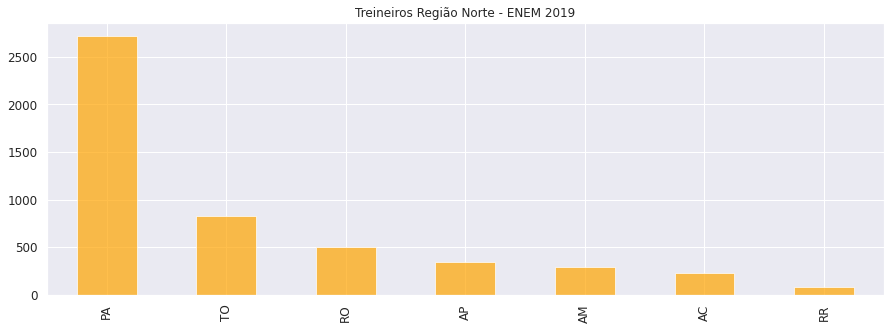

In [ ]:
#plotar gráfico em barra de treineiros por Estado
treineiros_UF_norte = pretas_norte.query('IN_TREINEIRO == 1')["SG_UF_RESIDENCIA"].value_counts().plot(kind='bar',  figsize =(15,5), color='orange', 
                                                               title='Treineiros Região Norte - ENEM 2019', 
                                                               fontsize =(12), alpha = 0.7)




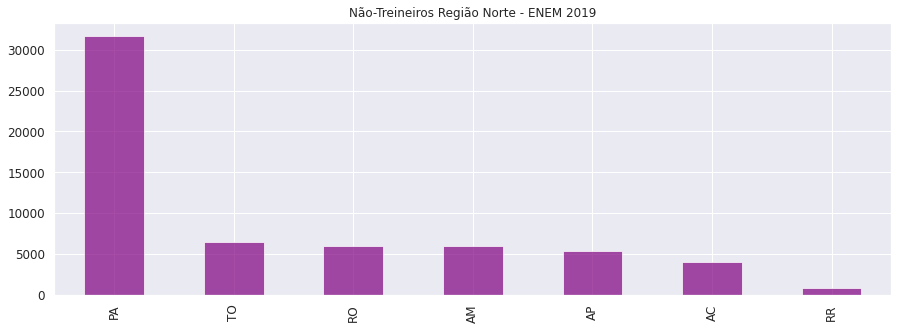

In [ ]:
#plotar gráfico em barra de não treineiros por Estado

nao_treineiros_UF_norte = pretas_norte.query('IN_TREINEIRO == 0')["SG_UF_RESIDENCIA"].value_counts().plot(kind='bar', figsize =(15,5), color='purple', 
                                                               title='Não-Treineiros Região Norte - ENEM 2019', 
                                                               fontsize =(12), alpha = 0.7)

In [ ]:
treineiros_UF_norte = pretas_norte.query('IN_TREINEIRO == 1')["SG_UF_RESIDENCIA"].value_counts(normalize=True)
nao_treineiros_UF_norte = pretas_norte.query('IN_TREINEIRO == 0')["SG_UF_RESIDENCIA"].value_counts(normalize=True)
print(treineiros_UF_norte * 100,
      nao_treineiros_UF_norte * 100)

PA    54.519944
TO    16.516336
RO     9.981960
AP     6.855081
AM     5.953097
AC     4.550010
RR     1.623572
Name: SG_UF_RESIDENCIA, dtype: float64 PA    52.534509
TO    10.774355
RO     9.915986
AM     9.877873
AP     8.802426
AC     6.659817
RR     1.435034
Name: SG_UF_RESIDENCIA, dtype: float64


## **Mas será que os treineiros da região norte se sairam melhor na redação?**

In [ ]:
mediana_treineiro_nota_redacao =pretas_norte.query('IN_TREINEIRO == 1').median()['NU_NOTA_REDACAO']
mediana_treineiro_nota_redacao


540.0

### A mediana dos alunos treineiros na redação foi de **540**

In [ ]:
mediana_nao_treineiro_nota_redacao = pretas_norte.query('IN_TREINEIRO == 0').median()["NU_NOTA_REDACAO"]
mediana_nao_treineiro_nota_redacao


560.0

### Já a mediana dos alunos não treineiros, foi de **560**

### Pode se concluir que não há muita distância da mediana  de alunos treineiros e não treineiros na Região Norte. Mas qual será a idade das pessoas treineiras. Será alunos do 1º e 2º  ano entre 14 - 17 anos ou pessoas mais velhas apenas testando seus conhecimentos?
![HelloUrl](https://media3.giphy.com/media/aAccWtx0tMyTm/giphy.gif?cid=ecf05e47e73a6c26aa1f2dabc1da6ebda60e31d29fe23eb7&rid=giphy.gif "cat")






N/A:Sou extremamente gateira, claro que ia ter gif de gatinho :3

## **Histograma das idades por idade dos Treineiros**

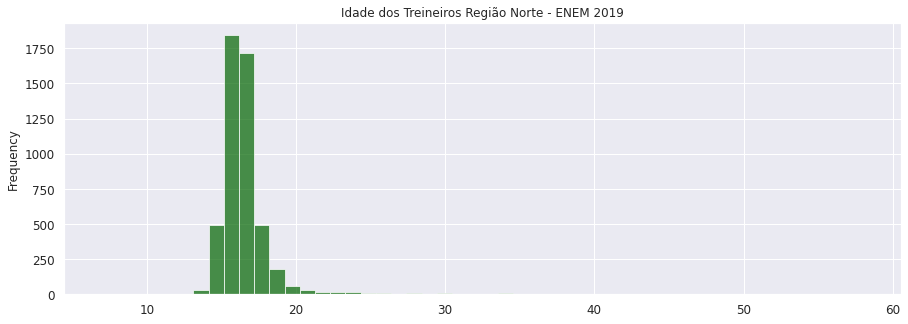

In [ ]:
idade_treineiros_norte = pretas_norte.query('IN_TREINEIRO == 1')['NU_IDADE'].plot(kind='hist', bins = 50, figsize =(15,5), color='darkgreen', 
                                                               title='Idade dos Treineiros Região Norte - ENEM 2019', 
                                                               fontsize =(12), alpha = 0.7)

In [ ]:
median_idade_treineiros_norte = pretas_norte.query('IN_TREINEIRO == 1').median()['NU_IDADE']
median_idade_treineiros_norte

17.0

## **Viu?! Como presumir, a mediana dos treineiros é de 17 anos!**
![HelloUrl](https://media1.giphy.com/media/fAE6PvnPKNbb9WfGxB/giphy.gif?cid=ecf05e47bh2gy7kngq07ibm9p2d1ub841wubvard2yxqyr5o&rid=giphy.gif "Calm")

Juro que não fiz a conta antes, foi tudo suposição u.u

### **E quem se saiu melhor: As pretinhas ou os pretinhos? Primeiro vamos analisar a quantidade de inscritos por sexo.**

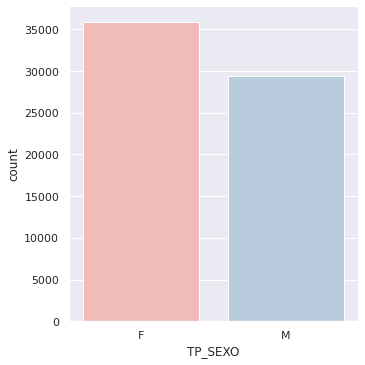

In [ ]:
#obs: a função "with sns.color_palette('')" força uma paleta de cores diferente para plotar gráficos do sns (seaborn)
with sns.color_palette('Pastel1'):
   sns.catplot(x='TP_SEXO', kind ='count', data = pretas_norte)
                        

In [ ]:
sexo_total_UF_norte = pretas_norte["TP_SEXO"].value_counts().sort_index() / len(pretas_norte["TP_SEXO"]) * 100
sexo_total_UF_norte

F    54.975817
M    45.024183
Name: TP_SEXO, dtype: float64

### As pretinhas são a maioria com 54%. Os pretinhos com 45%. Quem será que foi melhor na redação? Façam suas apostas =D
![HelloUrl](https://media3.giphy.com/media/KZh59s4Y9KDlNjv5iI/giphy.gif?cid=ecf05e47tjwppxlg4clzexl876llantnwfhu119we9ogr79p&rid=giphy.gif "Woman")


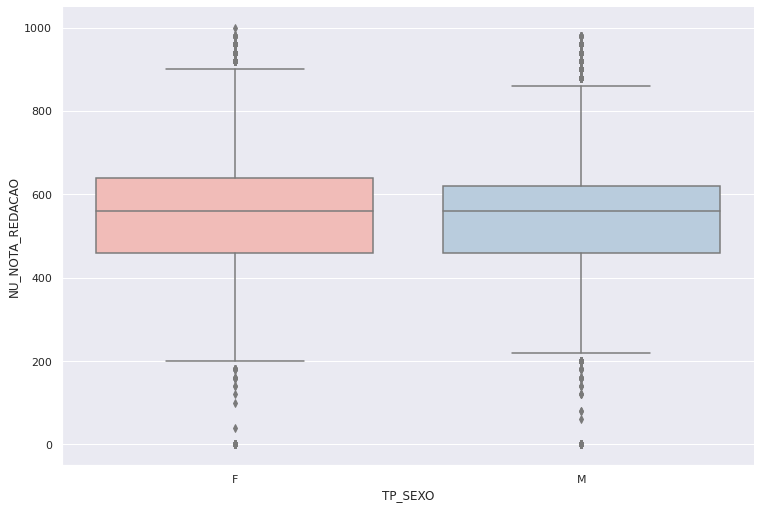

In [ ]:
with sns.color_palette('Pastel1'):
   sns.catplot(x='TP_SEXO', y='NU_NOTA_REDACAO', kind ='box',height=7, aspect= 1.5, data = pretas_norte);
  

### Como você pode ver as mulheres tiveram resultado um pouquinho melhor na redação do que os homens.Mas observe com atenção que a diferença é bem pequena, infelizmente. 

## **Mas lembra que apenas UM inscrito da Região Norte tirou nota 1000? Vamos saber quem foi?!**

In [ ]:
nota_mil = pretas_norte.query('NU_NOTA_REDACAO >= 1000')['TP_SEXO'].value_counts()
nota_mil

F    1
Name: TP_SEXO, dtype: int64

# TU-DO DE-LAS!

![HelloUrl](
https://media0.giphy.com/media/X9sCLBHth3xbW/giphy.gif?cid=ecf05e477fcc06ddc46bc84913e39d17aff69bc573f0a605&rid=giphy.gif "Calm")


### Mas agora trazendo um assunto mais complexo, que vai dizer muito sobre o histórico de educação e ecônomico na Região Norte: Grau de escolaridade dos pais e mães das (os) candidatas (os) pretas (os).
### Não é novidade para ninguém que as Regiões Norte e Nordeste tem os piores índices econômico e educacional do país, dá um google e você olha rápido alguma notícia negativa em relação a essas duas áreas. Na última pesquisa de Desigualdade por Cor ou Raça feito pelo IBGE (2018),   **37%** da população Preta ou Parda de 25 anos de idade ou mais não tem o Ensino Fundamental Completo e apenas **10,9%** possui ensino superior completo.  


### **Vamos começar, identificando a escolaridade dos pais e mães dos inscritos por Estado. E qual dos Estados tem maior participação na letra D = Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.**

In [ ]:
#ordenar em ordem alfabética e não por quantidade
escolaridade_pais = pretas_norte["Q001"].sort_values(ascending = True).unique()
escolaridade_pais

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'], dtype=object)

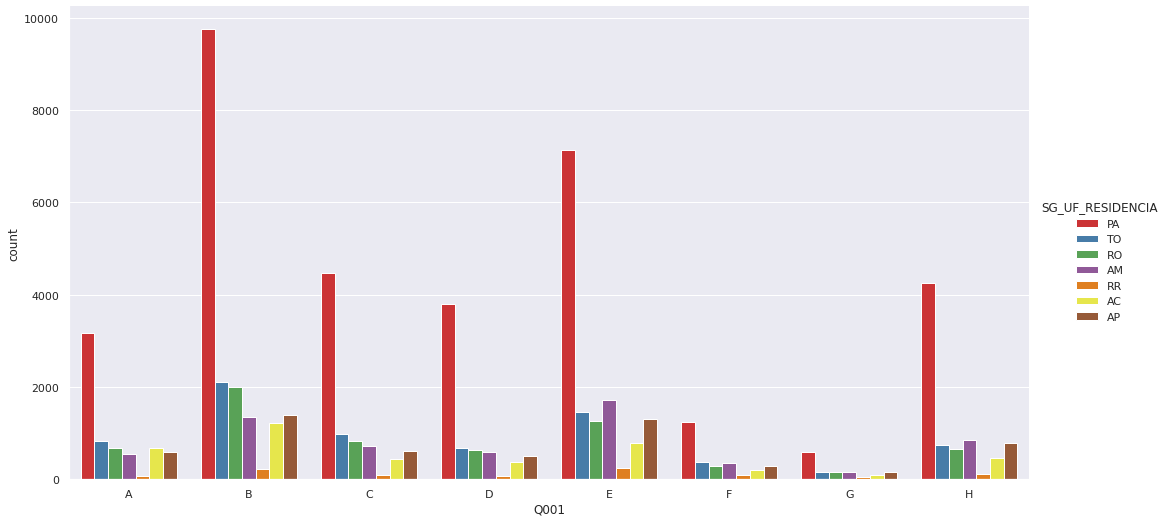

In [ ]:
with sns.color_palette('Set1'):
  sns.catplot(x='Q001', kind ='count', hue='SG_UF_RESIDENCIA', data = pretas_norte, order = escolaridade_pais, height=7.2, aspect =2)


## 'Ah ta, e eu lá vou saber o que significa A,B,C??' Eu sei que você pensou isso -_- 
#### Dicionário abaixo:
###### **A** = Nunca estudou
###### **B** = Não completou a 4ª série/5º ano do Ensino Fundamental.
###### **C** = Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.
###### **D** = Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.
###### **E** = Completou o Ensino Médio, mas não completou a Faculdade.
###### **F** = Completou a Faculdade, mas não completou a Pós-graduação.
###### **G** = Completou a Pós-graduação.
###### **H** = Não sei.

### Pará em primeiro lugar. Você pode observar que no grupo B onde, identifica os pais que não completaram a 4ª e 5ª série do Ensino Fundamental, as barras são mais elevadas que nos outros grupos. O grupo E (Ens.Médio completo mas não completou a Faculdade) apresenta barras com nível um próximo ao Grupo B. Em relação aos demais grupos é bem mais nítida quanto mais alto o grau de estudo menor a barra. Mas será que o grau de escolaridade dos pais, implica no resultado da Redação?

### Veremos a seguir: 

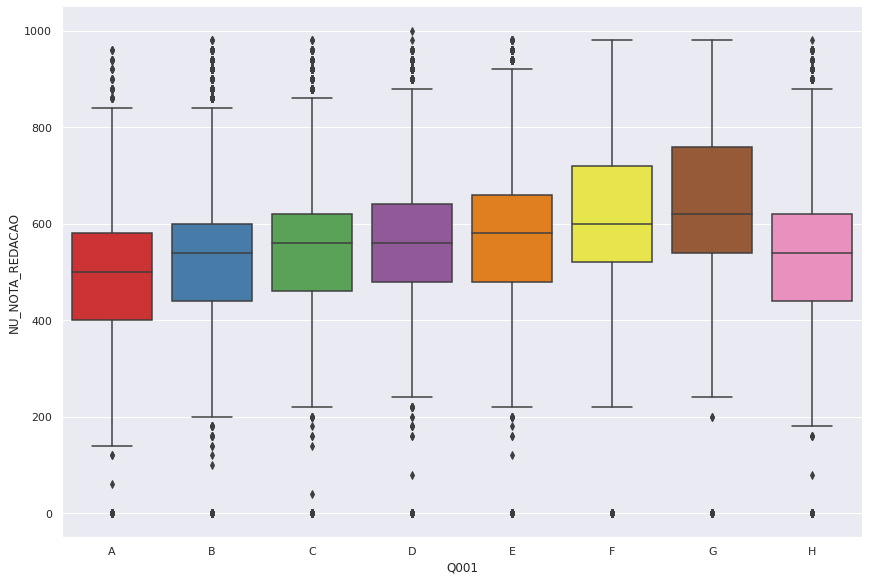

In [ ]:
with sns.color_palette('Set1'):
 sns.catplot(x='Q001', y='NU_NOTA_REDACAO', kind ='box',height=8, aspect= 1.5, data = pretas_norte,
            order = escolaridade_pais);
 


### Como podemos ver, quanto maior o grau de escolaridade maior a nota da (o) candidata (o) na redação ENEM 2019. Veja o grupo G (Pais com Pós-Graduação). O box forma quase uma escadinha. As [**Outliers**](https://medium.com/ensina-ai/outlier-o-ponto-fora-da-curva-1f28f3d9c23) (os pontinhos) que não são tão outliers assim,rs. Mostra que independente da escolaridade dos pais, você pode sim tirar uma nota acima de 700 no enem e como você pode alcançar isso? **Treinando!**
![HelloUrl](https://media4.giphy.com/media/d3mlE7uhX8KFgEmY/giphy.gif?cid=ecf05e47b9ik2bbsfjktgidzwzok970z7zigjofzt68s720c&rid=giphy.gif "think")


**Mas será que ser treineiro no ENEM, é um luxo que só quem tem pais com ensino superior pode ter??** 

Vamos ver a seguir:

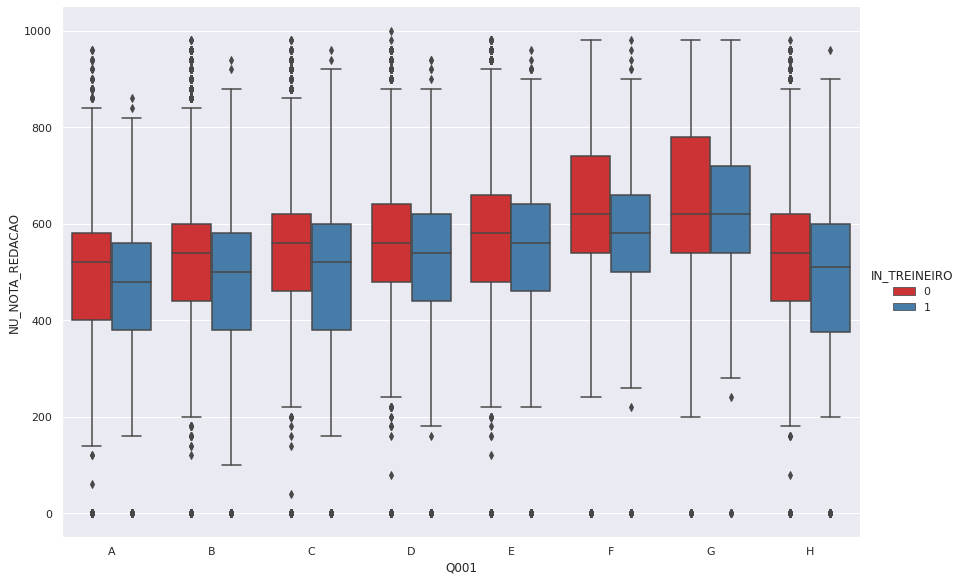

In [ ]:
with sns.color_palette('Set1'):
 sns.catplot(x='Q001', y='NU_NOTA_REDACAO', hue ='IN_TREINEIRO', kind ='box',height=8, aspect= 1.5, data = pretas_norte,
            order = escolaridade_pais);

Dicionário:

1.   Treineiro
0.   Não Treineiro

Então, observe que no grupo G mantêm um alinhamento, linha essa que significa a mediana do [Boxplot](https://operdata.com.br/blog/como-interpretar-um-boxplot/). De modo geral, há tpouca diferença das notas dos treineiros com o dos não treineiros em cada grupo. Mas observe o padrão nos grupo A,B e C a nota praticamente é igual para os treineiros destes grupos.



## Conclui-se que sim, a escolaridade dos pais pode sim vim afetar a nota na redação **MAS** como falei no ínicio, aqui não há respostas absolutas mas sim análises que trazem diversas visões sobre o assunto, eu por exemplo, acredito que quando você tem referências em casa você tende a se sair melhor na vida escolar, pois há aquela responsabilidade e incentivo parental, entende? 

### Seguimos agora para análise do grau de escolaridade das mães

In [ ]:
escolaridade_maes = pretas_norte["Q002"].sort_values(ascending = True).unique()
escolaridade_maes


array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'], dtype=object)


###### **A** = Nunca estudou
###### **B** = Não completou a 4ª série/5º ano do Ensino Fundamental.
###### **C** = Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.
###### **D** = Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.
###### **E** = Completou o Ensino Médio, mas não completou a Faculdade.
###### **F** = Completou a Faculdade, mas não completou a Pós-graduação.
###### **G** = Completou a Pós-graduação.
###### **H** = Não sei.

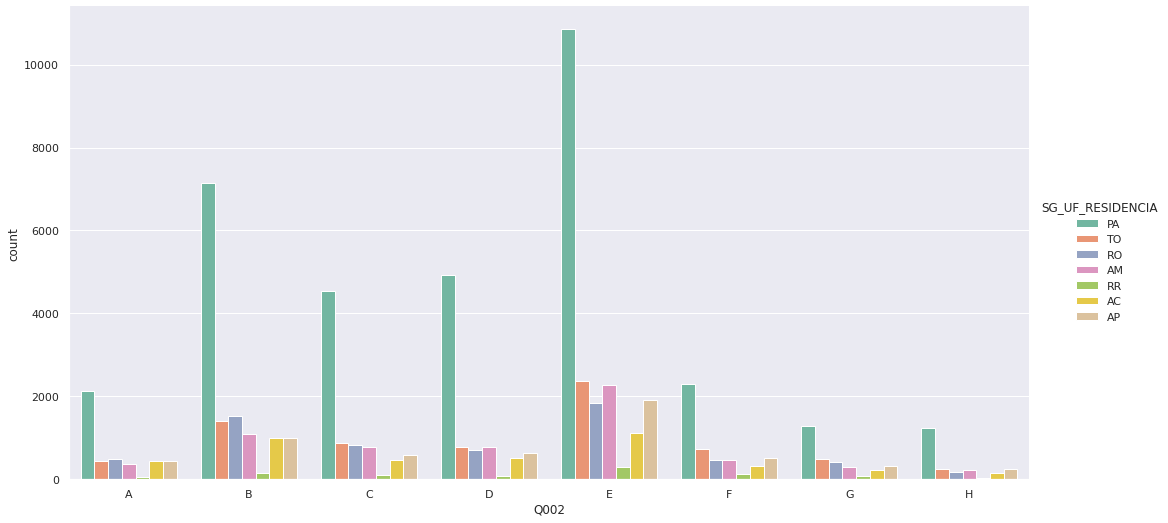

In [ ]:
with sns.color_palette('Set2'):
 sns.catplot(x='Q002', kind ='count', hue='SG_UF_RESIDENCIA', data = pretas_norte,
            order = escolaridade_maes, height=7.2, aspect =2)


# **Olha só!**
![HelloUrl](https://media0.giphy.com/media/26hityqUtkQfLoWQM/giphy.gif?cid=ecf05e474an90n7qlis5ir7ae2eyhk546socyso55qx0uqrv&rid=giphy.gif "look")

### É nítido que o Grupo E (Completou o Ensino Médio, mas não completou a Faculdade) das mães apresenta mais presença do que no gráfico dos pais. E o Pará na frente com o maior número de mães com ensino médio completo! Vamos ver se isso se reflete na nota dos candidatos?

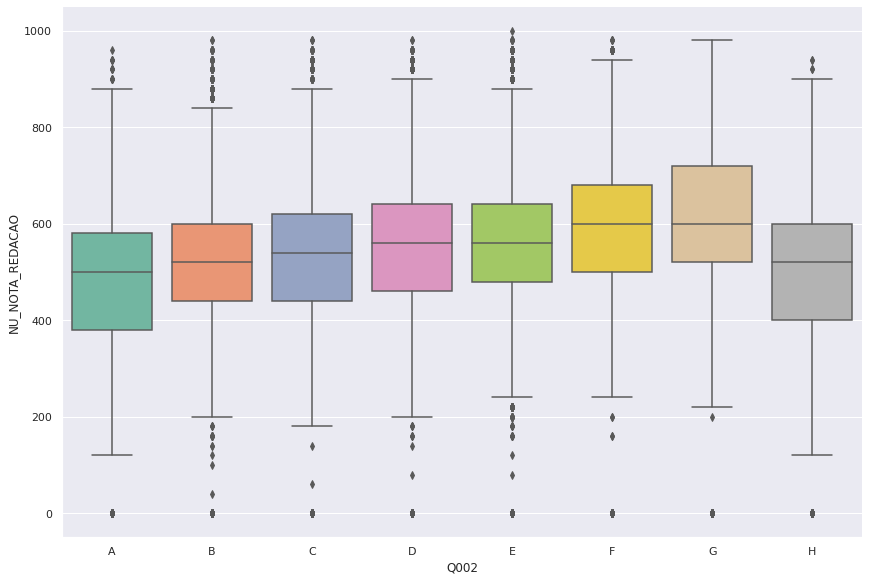

In [ ]:
with sns.color_palette('Set2'):
 sns.catplot(x='Q002', y='NU_NOTA_REDACAO', kind ='box',height=8, aspect= 1.5, data = pretas_norte,
            order = escolaridade_maes);

## Mas olha que curioso, as notas dos candidatos que tem mães dos grupos A,B,C apresenta pouca diferença e já nos grupos D e E mantêm-se estático. Nos grupos F e G você já percebe a subida rápida da nota e despencar no grupo H como visto no gráfico da escolaridade dos pais também.

### Veremos a seguir o gráfico de escolaridade das mães por treineiros:

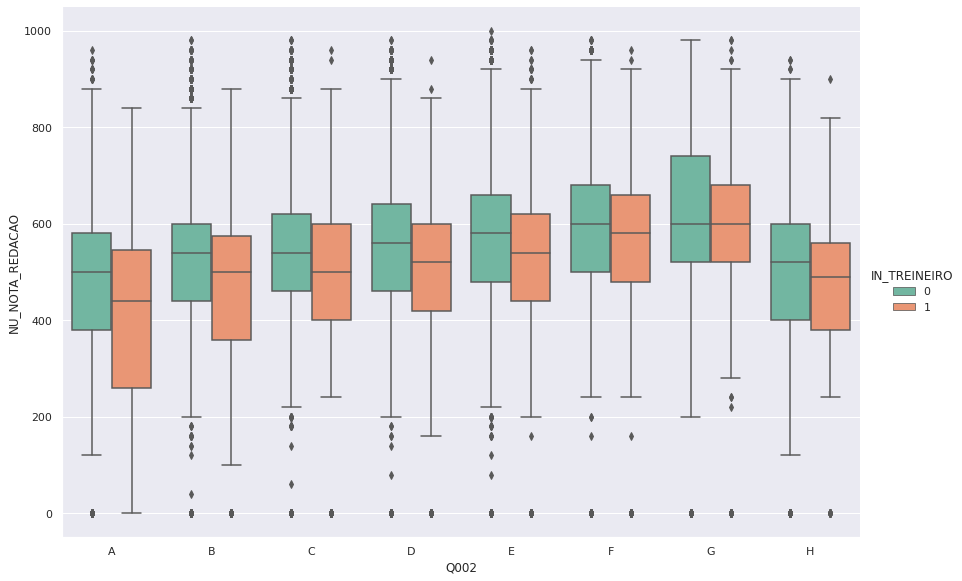

In [ ]:
with sns.color_palette('Set2'):
 sns.catplot(x='Q002', y='NU_NOTA_REDACAO', hue ='IN_TREINEIRO', kind ='box',height=8, aspect= 1.5, data = pretas_norte,
            order = escolaridade_maes);

Legenda:

1.   Treineiro
0.   Não Treineiro

### Olha só que interessante, no gráfico das mães apresenta o mesmo comportamento do Grupo G dois pais: a mediana se mantêm alinhada. Mas parece que há notas mais baixas na redação para quem é treineiro, não é? Volte e compare 1 min com o gráfico dos pais. Notou a diferença? Parece que os candidatos com mães com a escolaridade dos grupos A e B se propõem a treinar para o ENEM. O que já inverte um pouco aquele pensamento do gráfico dos pais. Aqui você pode imaginar uma mãe que não estudou mas que incentiva seus filhos a estudarem para ter um futuro melhor, por exemplo.

# **Entrando no bloco final da análise, vamos ver se a profissão dos pais é um fator relevante na nota da Redação dos candidatos da Região Norte. Começando por Estado.**

In [ ]:
profissao_pais = pretas_norte["Q003"].sort_values(ascending = True).unique()
profissao_pais

array(['A', 'B', 'C', 'D', 'E', 'F'], dtype=object)

## "La vem ela com esses A,B,C sem significado" 
![HelloUrl](https://media0.giphy.com/media/9M1ALCAKvXQKSf9Zfo/giphy.gif?cid=ecf05e47ow68akponncbevwlf4xal9dh2168cmo2ng3pzokh&rid=giphy.gif "Calm")

### **calma bb, vou colocar o dicionário aqui em baixo.**

**A**	= Grupo 1: Lavrador, agricultor sem empregados, bóia fria, criador de animais (gado, porcos, galinhas, ovelhas, cavalos etc.), apicultor, pescador, lenhador, seringueiro, extrativista.

**B** = Grupo 2: Diarista, empregado doméstico, cuidador de idosos, babá, cozinheiro (em casas particulares), motorista particular, jardineiro, faxineiro de empresas e prédios, vigilante, porteiro, carteiro, office-boy, vendedor, caixa, atendente de loja, auxiliar administrativo, recepcionista, servente de pedreiro, repositor de mercadoria.

**C**= Grupo 3: Padeiro, cozinheiro industrial ou em restaurantes, sapateiro, costureiro, joalheiro, torneiro mecânico, operador de máquinas, soldador, operário de fábrica, trabalhador da mineração, pedreiro, pintor, eletricista, encanador, motorista, caminhoneiro, taxista.

**D** =	Grupo 4: Professor (de ensino fundamental ou médio, idioma, música, artes etc.), técnico (de enfermagem, contabilidade, eletrônica etc.), policial, militar de baixa patente (soldado, cabo, sargento), corretor de imóveis, supervisor, gerente, mestre de obras, pastor, microempresário (proprietário de empresa com menos de 10 empregados), pequeno comerciante, pequeno proprietário de terras, trabalhador autônomo ou por conta própria.

 **E** = Grupo 5: Médico, engenheiro, dentista, psicólogo, economista, advogado, juiz, promotor, defensor, delegado, tenente, capitão, coronel, professor universitário, diretor em empresas públicas ou privadas, político, proprietário de empresas com mais de 10 empregados.
 
**F**	= Não sei.

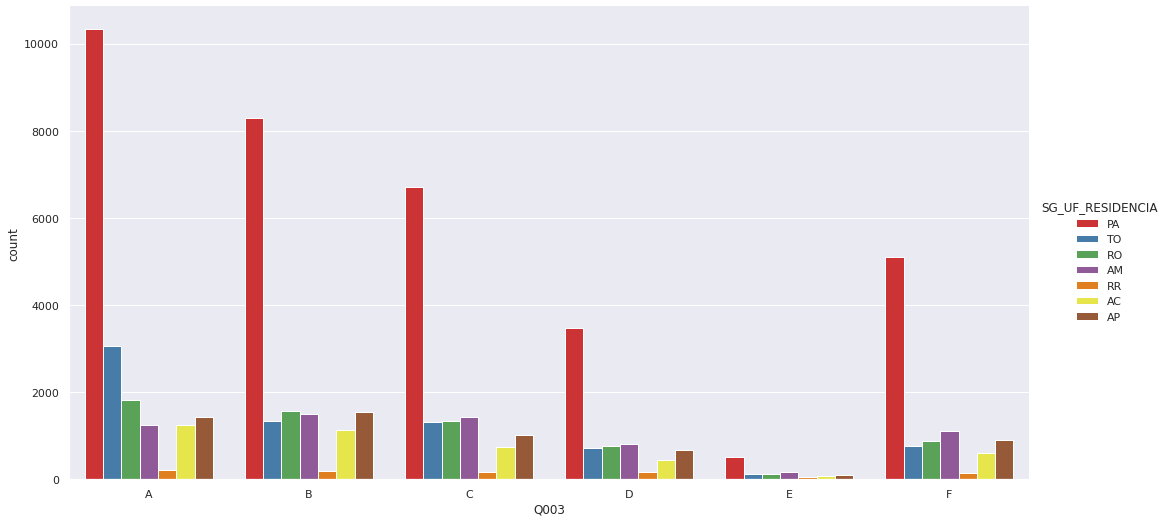

In [ ]:
with sns.color_palette('Set1'):
 sns.catplot(x='Q003', kind ='count', hue='SG_UF_RESIDENCIA', data = pretas_norte,
            order = profissao_pais, height=7.2, aspect =2)

## **Cabe aqui um "ladeira abaixo" ?**
 O grupa A onde encontra pais que são profissionais da zona rural, você pode identificar que é o maior grupo entre os Estados do Norte. Depois com os restantes dos grupos B, C e D vão caindo e despenca no grupo E. 

E no grupo F onde o candidato não sabe informar a profissão do pai, ver semelhança com a quantidade do grupo C.

# Agora comparando as profissões com a nota da Redação.

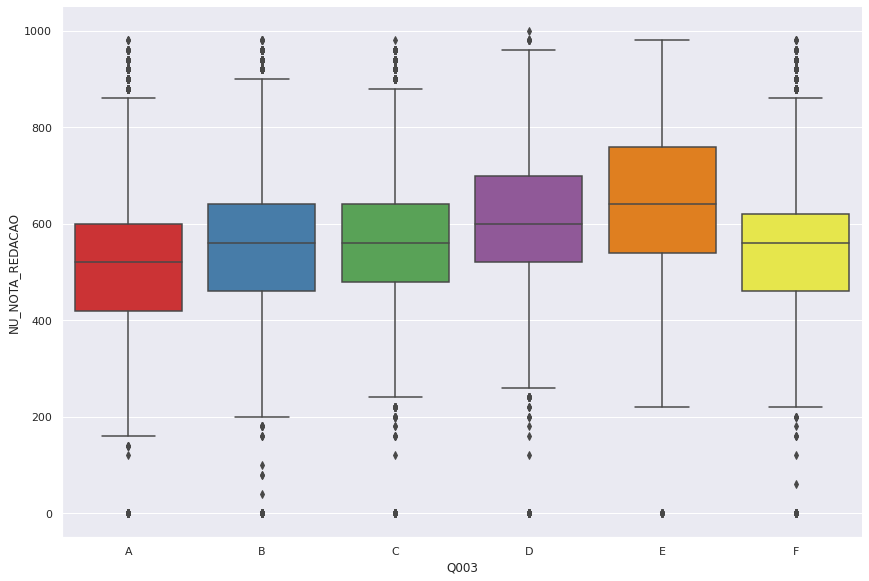

In [ ]:
with sns.color_palette('Set1'):
 sns.catplot(x='Q003', y='NU_NOTA_REDACAO', kind ='box',height=8, aspect= 1.5, data = pretas_norte,
            order = profissao_pais);

## Olha a mediana se alinhando novamente por aqui!
No grupo B e C você ver a estática e uma leve subida nos grupo D e E e queda no grupo F. Pode se verificar que canditados que tem pais Médicos e Engenheiros tem nota melhor na redação.



## Conclui-se que a profissão dos pais tem sua parcela de ajuda no desempenho da nota da redação das (os) candidatas (os). Aqui você presumir que os filhos dos pais do grupo E estudam em escolas particulares onde o grau de ensino é melhor do que na escola pública. Ja nos grupos B e C que apresentaram  essa simetria na mediana, a gente pode presumir que há um ambiente familiar onde o filho pode se desenvolver apesar da baixa renda que essas profissões geram. No grupo D onde abriga microempreendedores e professores, pode se enxergar filhos ajudando os pais e assim criando uma consciência mais consistente da realidade, tornando mais críticos em atividades de dissertação, por exemplo. São várias hipóteses! 

# **Agora olhando para as mães, será que a gente encontra esse mesmo comportamento?**

### Vamos ver!

In [ ]:
profissao_maes = pretas_norte["Q004"].sort_values(ascending = True).unique()
profissao_maes

array(['A', 'B', 'C', 'D', 'E', 'F'], dtype=object)

**A**	= Grupo 1: Lavrador, agricultor sem empregados, bóia fria, criador de animais (gado, porcos, galinhas, ovelhas, cavalos etc.), apicultor, pescador, lenhador, seringueiro, extrativista.

**B** = Grupo 2: Diarista, empregado doméstico, cuidador de idosos, babá, cozinheiro (em casas particulares), motorista particular, jardineiro, faxineiro de empresas e prédios, vigilante, porteiro, carteiro, office-boy, vendedor, caixa, atendente de loja, auxiliar administrativo, recepcionista, servente de pedreiro, repositor de mercadoria.

**C**= Grupo 3: Padeiro, cozinheiro industrial ou em restaurantes, sapateiro, costureiro, joalheiro, torneiro mecânico, operador de máquinas, soldador, operário de fábrica, trabalhador da mineração, pedreiro, pintor, eletricista, encanador, motorista, caminhoneiro, taxista.

**D** =	Grupo 4: Professor (de ensino fundamental ou médio, idioma, música, artes etc.), técnico (de enfermagem, contabilidade, eletrônica etc.), policial, militar de baixa patente (soldado, cabo, sargento), corretor de imóveis, supervisor, gerente, mestre de obras, pastor, microempresário (proprietário de empresa com menos de 10 empregados), pequeno comerciante, pequeno proprietário de terras, trabalhador autônomo ou por conta própria.

 **E** = Grupo 5: Médico, engenheiro, dentista, psicólogo, economista, advogado, juiz, promotor, defensor, delegado, tenente, capitão, coronel, professor universitário, diretor em empresas públicas ou privadas, político, proprietário de empresas com mais de 10 empregados.
 
**F**	= Não sei.

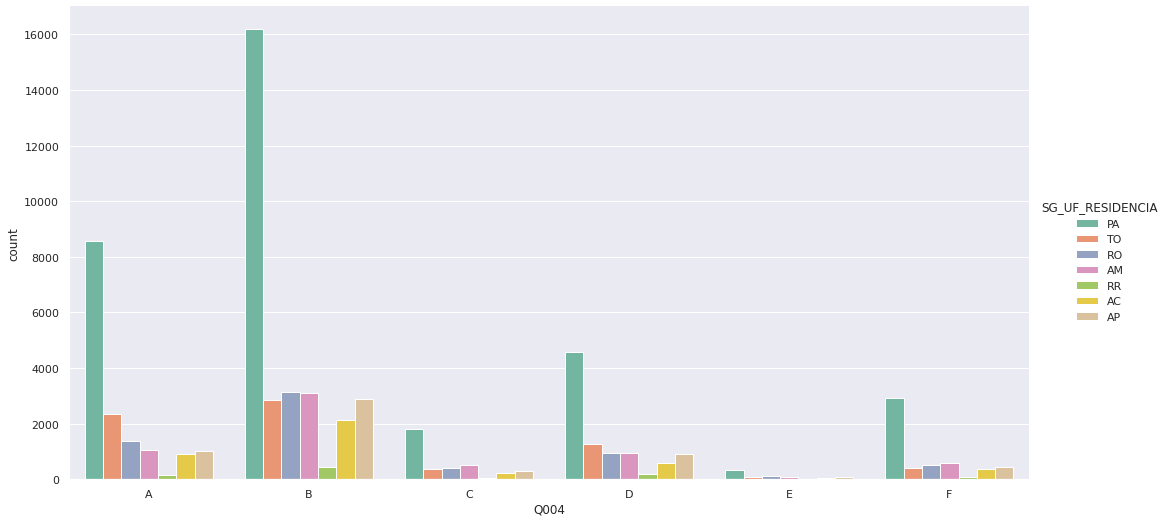

In [ ]:
with sns.color_palette('Set2'):
 sns.catplot(x='Q004', kind ='count', hue='SG_UF_RESIDENCIA', data = pretas_norte,
            order = profissao_maes, height=7.2, aspect =2)

# **Eita**
![HelloUrl](https://media0.giphy.com/media/xloWUcZkay1Fn3U5On/giphy.gif?cid=ecf05e47605gl4kr8jcs0dvxyhhz5o1g9wsywjtewh8wawmc&rid=giphy.gif "Calm")

(minha cara vendo esse gráfico)

### É, caro (a) leitor (a), nada fácil para mães dos pretinhxs. O maior conjunto de barras é do grupo B onde fica a categoria de diaristas e auxiliar administrativo e dentre outras. Profissões que pagam de salário mínimo a R$1,500 dependendo da empresa/cidade /Estado.

Quando fui auxiliar admninistrativo e ganhava R$ 1,200 e não durava o mês todo não, viu?!

## **Pra finalizar nosso último gráfico de comparação!**

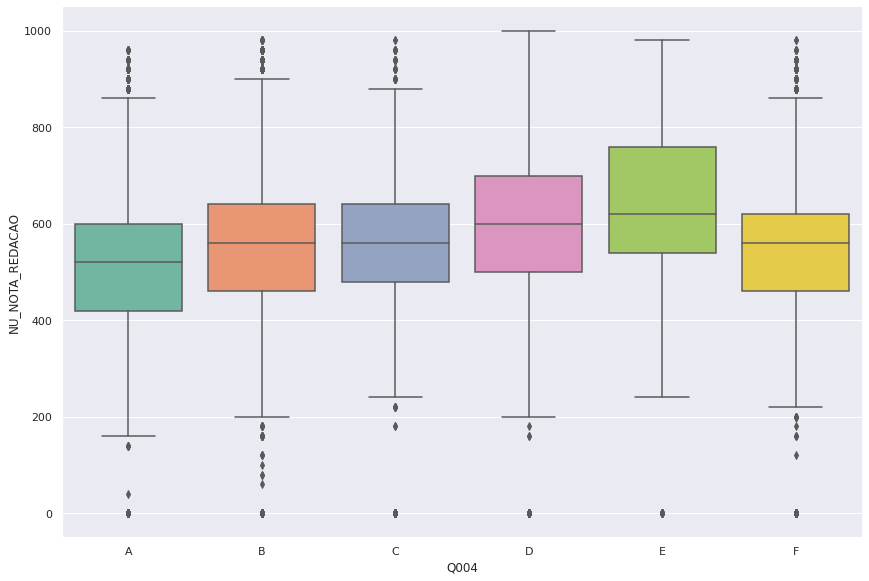

In [ ]:
with sns.color_palette('Set2'):
 sns.catplot(x='Q004', y='NU_NOTA_REDACAO', kind ='box',height=8, aspect= 1.5, data = pretas_norte,
            order = profissao_maes);

# **Eita 2**
 ![HelloUrl](https://media0.giphy.com/media/U23dgkTMaWoJGPrWGp/giphy.gif?cid=ecf05e47b6b8f385f5867efc52820c0c733828de46fecbd5&rid=giphy.gif"vish")
 
## Corri pra ver se não tinha errado algo no meu cógido mas é isso mesmo,rs. A relação da nota no gráfico de profissões dos mães é quase idêntico do gráfico dos pais. Coloquei de lado pra conferir e a aparentemente as únicas diferenças são nos grupos D e E onde os candidatos com mães Médicas e Professoras se sairam melhor na redação. 
## Então sim, a gente pode concluir que a linha de racicíonio do gráfico dos Pais/Nota Redação, serve para as mães também!

# **BÔNUS:**
Lembra que comentei lá em cima sobre os temas das redações e como eles podem vim a ser desiguais? Então trago aqui o número de inscritos por cada Estado que tem ou não internet em casa.

**A** = Não Tem Internet

**B** = Tem internet

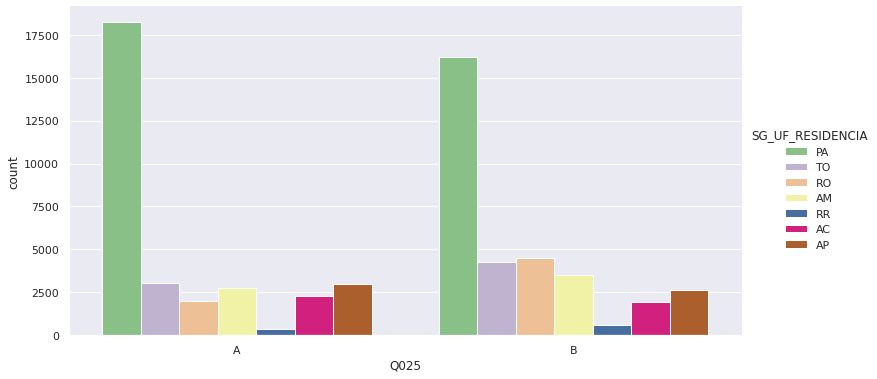

In [ ]:
with sns.color_palette('Accent'):
   sns.catplot(x='Q025', hue='SG_UF_RESIDENCIA', kind ='count', data = pretas_norte, height=5.2, aspect =2);

## **E por nota redação?**

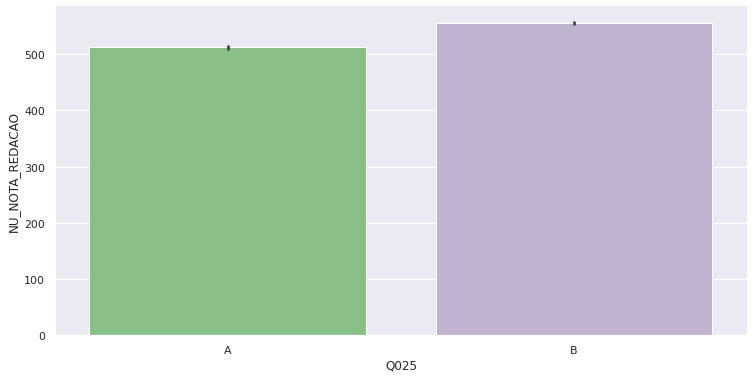

In [ ]:
with sns.color_palette('Accent'):
   sns.catplot(x='Q025', y='NU_NOTA_REDACAO', kind ='bar', data = pretas_norte, height=5.2, aspect =2);

# **O óbvio? Sim, claro!**

### As pessoas que se sairam melhor na redação tem internet em casa. Ter internet em casa é um privilégio sim, e se a maioria das pessoas estiverem em zonas periféricas é mais privilégio ainda (considerando os "gatos de internet" aqui,rs) ter acesso a informação é um privilégio, ter uma estrutura familiar e dinheiro fazem sim a diferença, mesmo que os responsáveis tenha uma a renda que não seja tão alta. E ainda mais quando se trata de pessoas pretas, onde acesso a educação de qualidade por muitas vezes é deficiente e dentre outras váriaveis que não cabe a estender por aqui para não desfocar do tema principal.

### E até aqui, pode se dizer que sim, a **profissão** e o **grau de escolaridade** de pai e mãe tem sua parcela de ajuda no desempenho do candidato na redação do ENEM! **A educação começa em casa**. E espero profundamente que no ENEM deste ano, apesar do momemento delicado, não tenha feito os sonhos da juventude preta de vencer na vida através do estudo. Que os dados do próximo ano me contem boas histórias!

## Se você chegou até aqui, meus sinceros agradecimentos!

![HelloUrl](https://media0.giphy.com/media/Uo0CJ8l5kVh2E/giphy.gif?cid=ecf05e47xx3ul5ecwz2q5u72dgrp6qvvc5blyyf3zzbixzgl&rid=giphy.giff "bye")

